In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

# 적절한 패딩 길이 구하기

In [2]:
data = pd.read_csv('c:/2nd_project/Data/talk_data/영화주제 대화 말뭉치 라벨링.csv')
data.head()

,text,label
0,다들 기생충 보셨어요,0
1,오스카 상 후보에 올랐단 소식 듣고 바로 봤어요,0
2,저는 개인적으로 다크한 걸 안 좋아해서 아직 못 봤어요,0
3,음그럴 수 있죠,0
4,봉준호 감독이 차기작을 준비하고 있다고 해서 한 번 그냥 물어봤어요 하하,0


In [3]:
data.shape

(74079, 2)

In [4]:
tokenizer = Komoran()

In [5]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(str(text_))] for text_ in data['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [6]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 5.81503530015254
토큰 길이 최대: 167
토큰 길이 표준편차: 2.956717002022719


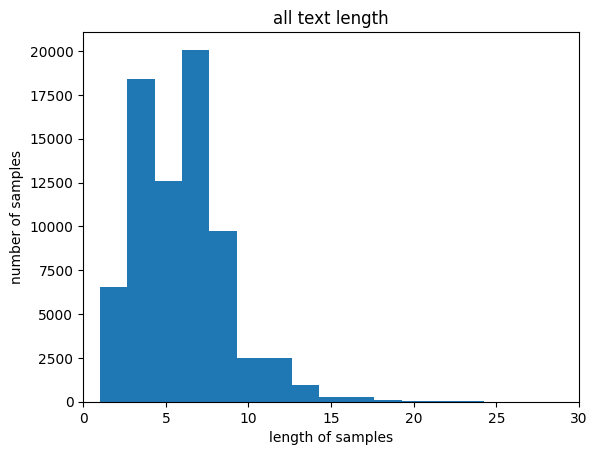

In [12]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.xlim(0,30)
plt.show()

In [23]:
select_length = 15

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 15 이하인 샘플의 비율: 0.9931424560266743
